In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import datetime
import io

# ECDC DATASET 

import datetime
import requests
now = datetime.datetime.now()
url1=('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
r=requests.get(url1, allow_redirects=True)
open(r"C:/Users/kmfj819/Desktop/Temp/test_covid1.xlsx", 'wb').write(r.content)

ecdc_df=pd.read_csv(url1, error_bad_lines=False, usecols = lambda column : column not in 
["dateRep","geoId","countryterritoryCode","popData2018"])

ecdc_df.reset_index(drop=True,inplace=True)
ecdc_df.rename(columns={'cases':'newcases','countriesAndTerritories':'country'},inplace=True)
ecdc_df.head()

,day,month,year,newcases,deaths,country,continentExp
0,21,4,2020,35,2,Afghanistan,Asia
1,20,4,2020,88,3,Afghanistan,Asia
2,19,4,2020,63,0,Afghanistan,Asia
3,18,4,2020,51,1,Afghanistan,Asia
4,17,4,2020,10,4,Afghanistan,Asia


In [5]:
countries=ecdc_df.groupby('country')
indiadf=countries.get_group("India")
indiadf['Date']=indiadf['day'].astype(str)+"/"+indiadf['month'].astype(str)
indiadf=indiadf.head(20)
#indiadf=indiadf[:-1] #dropping the last row in the df
indiadf=indiadf.sort_values(['month','day'])
indiadf.tail()


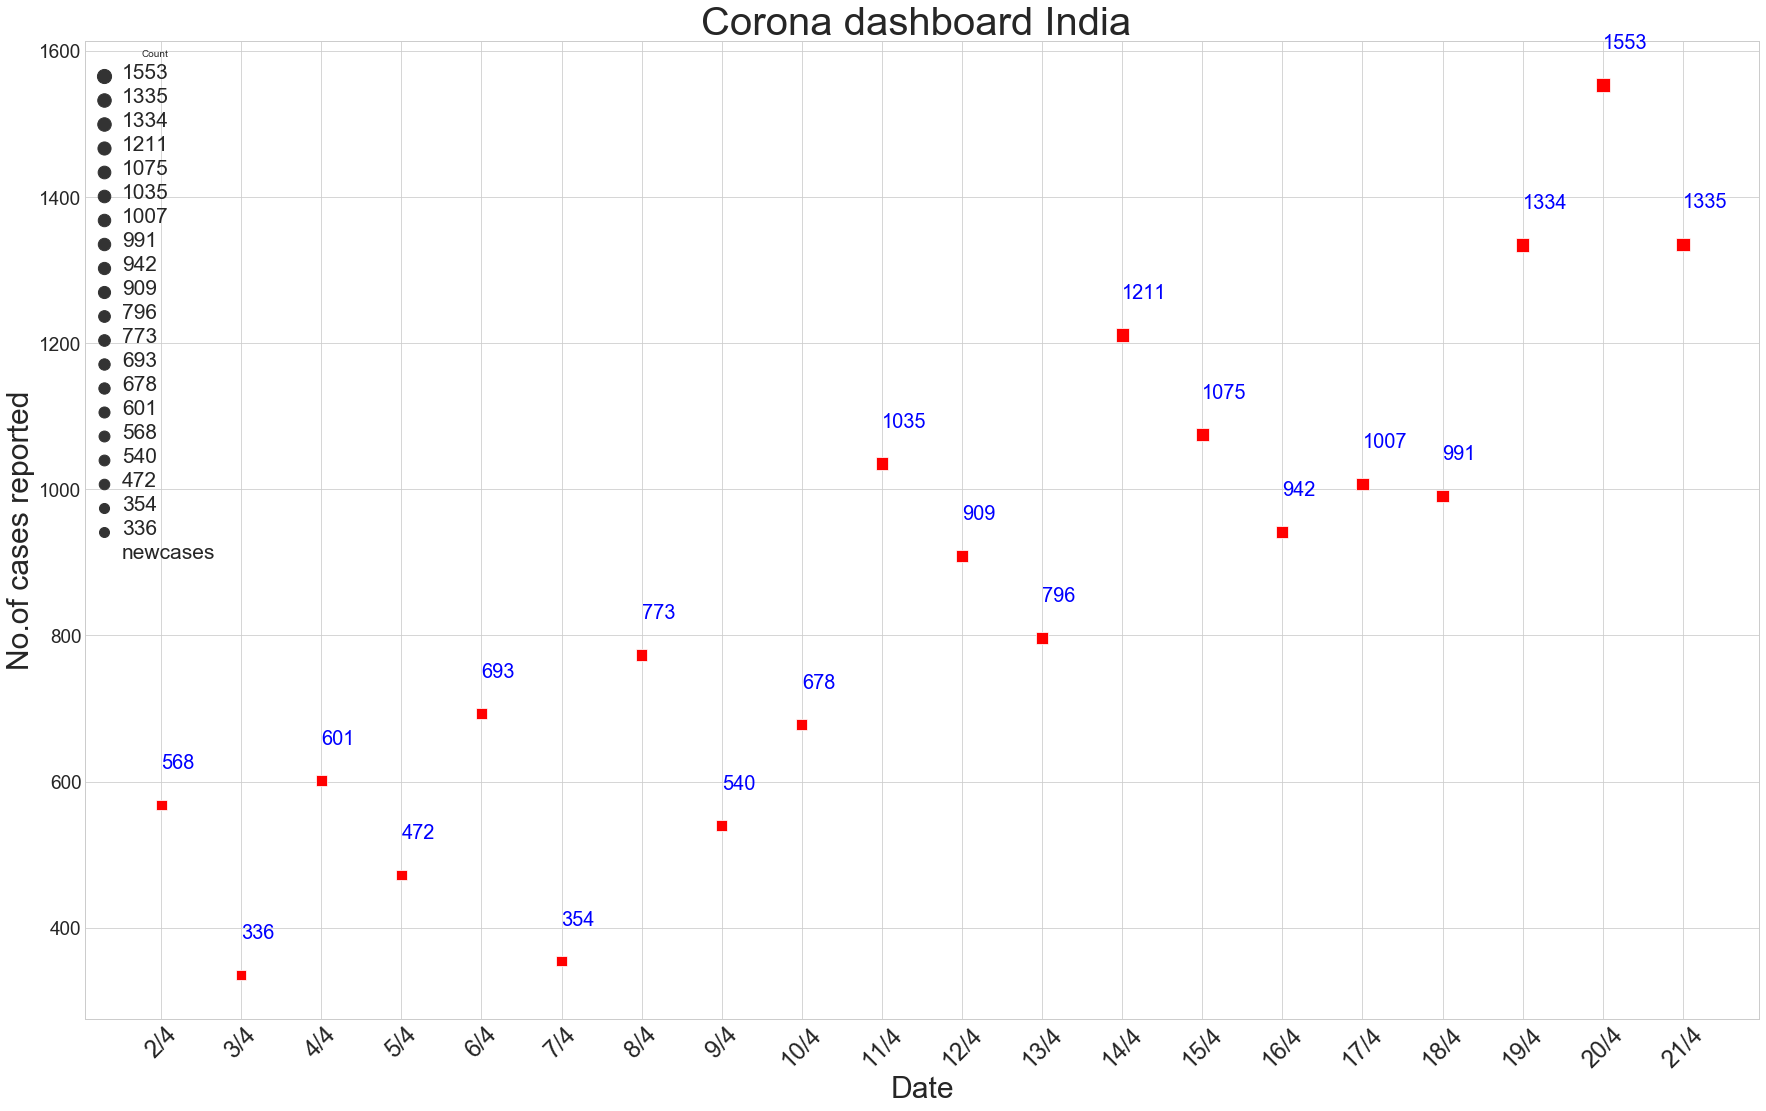

In [6]:
#fig, ax = plt.subplots()

#cmap = sns.cubehelix_palette(rot=2,as_cmap=True) 
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
plt.figure(figsize=(30, 18))
sns.despine(offset=10, trim=True);
plt.style.use('seaborn-whitegrid')
ax=sns.scatterplot(x="Date", y="newcases",
                        palette='set2',
                        #sizes=(4,40),
                        legend="full",
                        #hue='deaths',
                        #size='newcases',
                        data=indiadf,  
                       marker='s', 
                       color='r',size='newcases',sizes=(100,200)
                       )


# add annotations one by one with a loop
[ax.text(p[0], p[1]+50, p[1], color='b', size=20) for p in zip(ax.get_xticks(), indiadf['newcases'])]

plt.title("Corona dashboard India ", fontsize=40); #Corona Pandemic LIVE (India)- Created by SABI
plt.xlabel("Date",fontsize=30);
plt.ylabel("No.of cases reported",fontsize=30);
plt.xticks(size=24,rotation=45)
xticks = ax.get_xticks()
plt.yticks(size=19,rotation=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Count', loc='upper left')
plt.setp(ax.get_legend().get_texts(),fontsize=21)


plt.show()

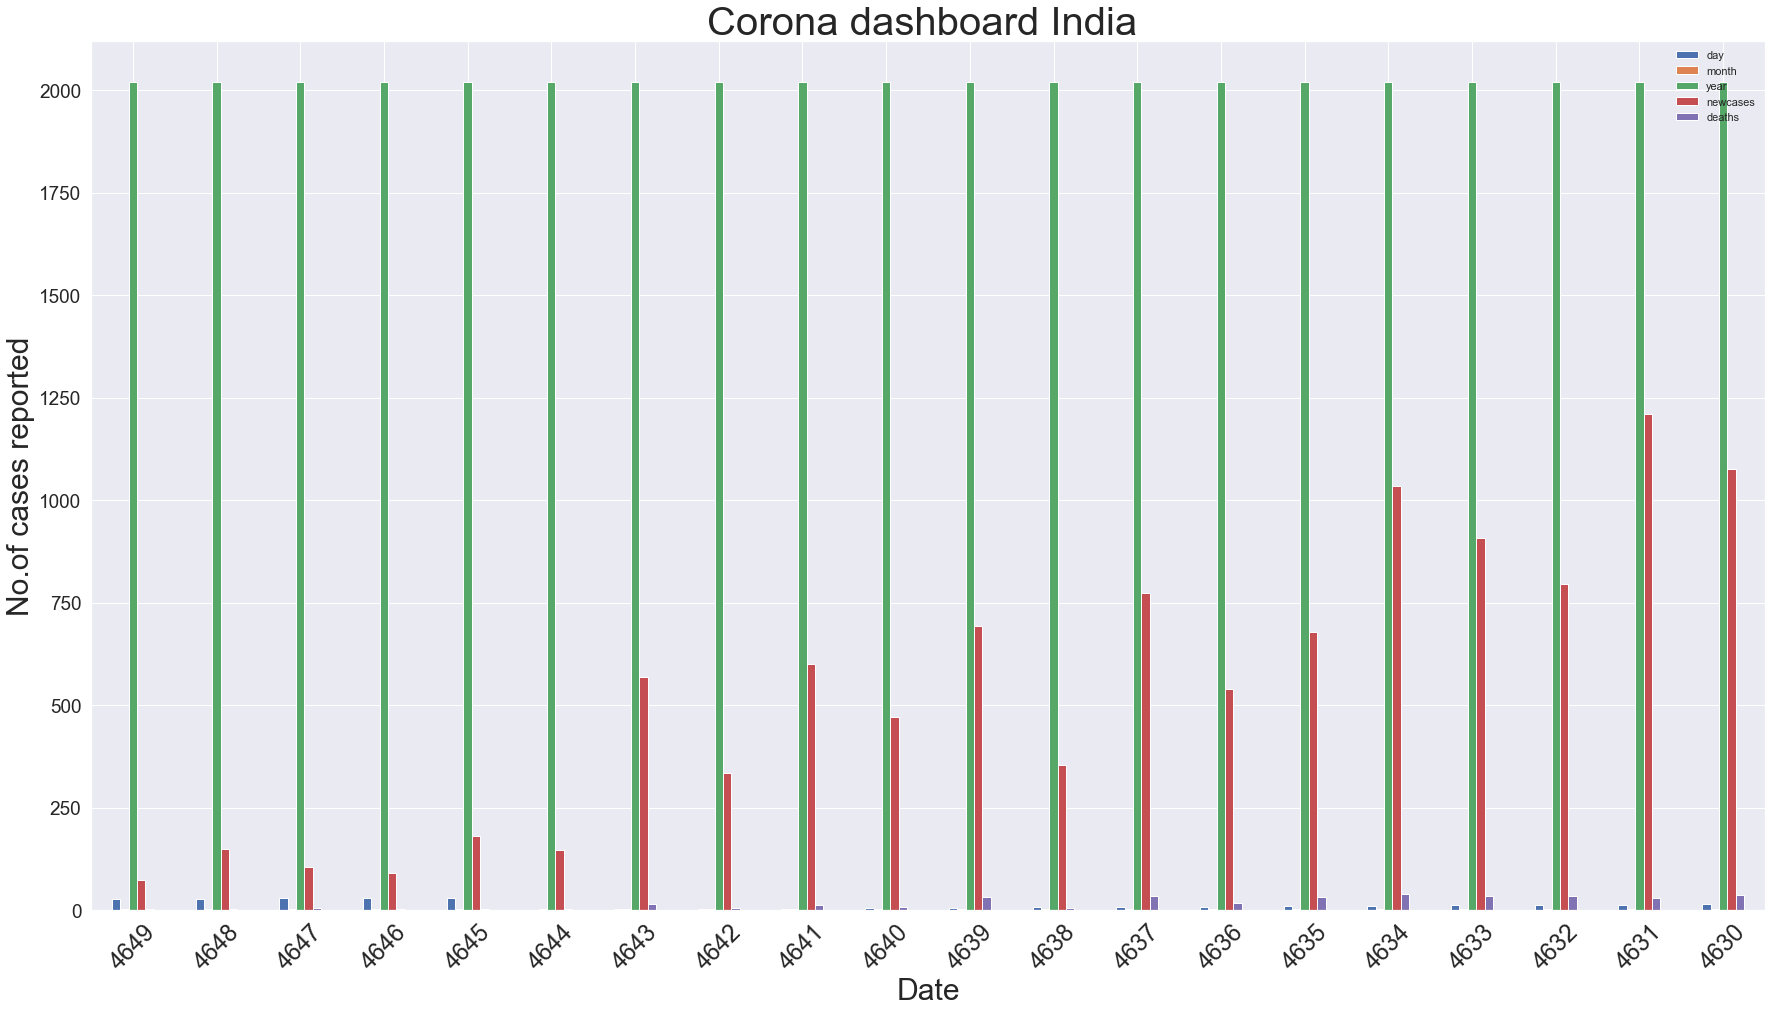

In [54]:

sns.set(style='darkgrid')
#palette=("Greens")
#sns.set_context("poster")
indiadf.tail(30).plot.bar(figsize=(30,16), rot=70)
plt.title("Corona dashboard India ", fontsize=40); #Corona Pandemic LIVE (India)- Created by SABI
plt.xlabel("Date",fontsize=30);
plt.ylabel("No.of cases reported",fontsize=30);
plt.xticks(size=24,rotation=45)
xticks = ax.get_xticks()
plt.yticks(size=19,rotation=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Count', loc='upper left')
plt.setp(ax.get_legend().get_texts(),fontsize=21)
plt.show()

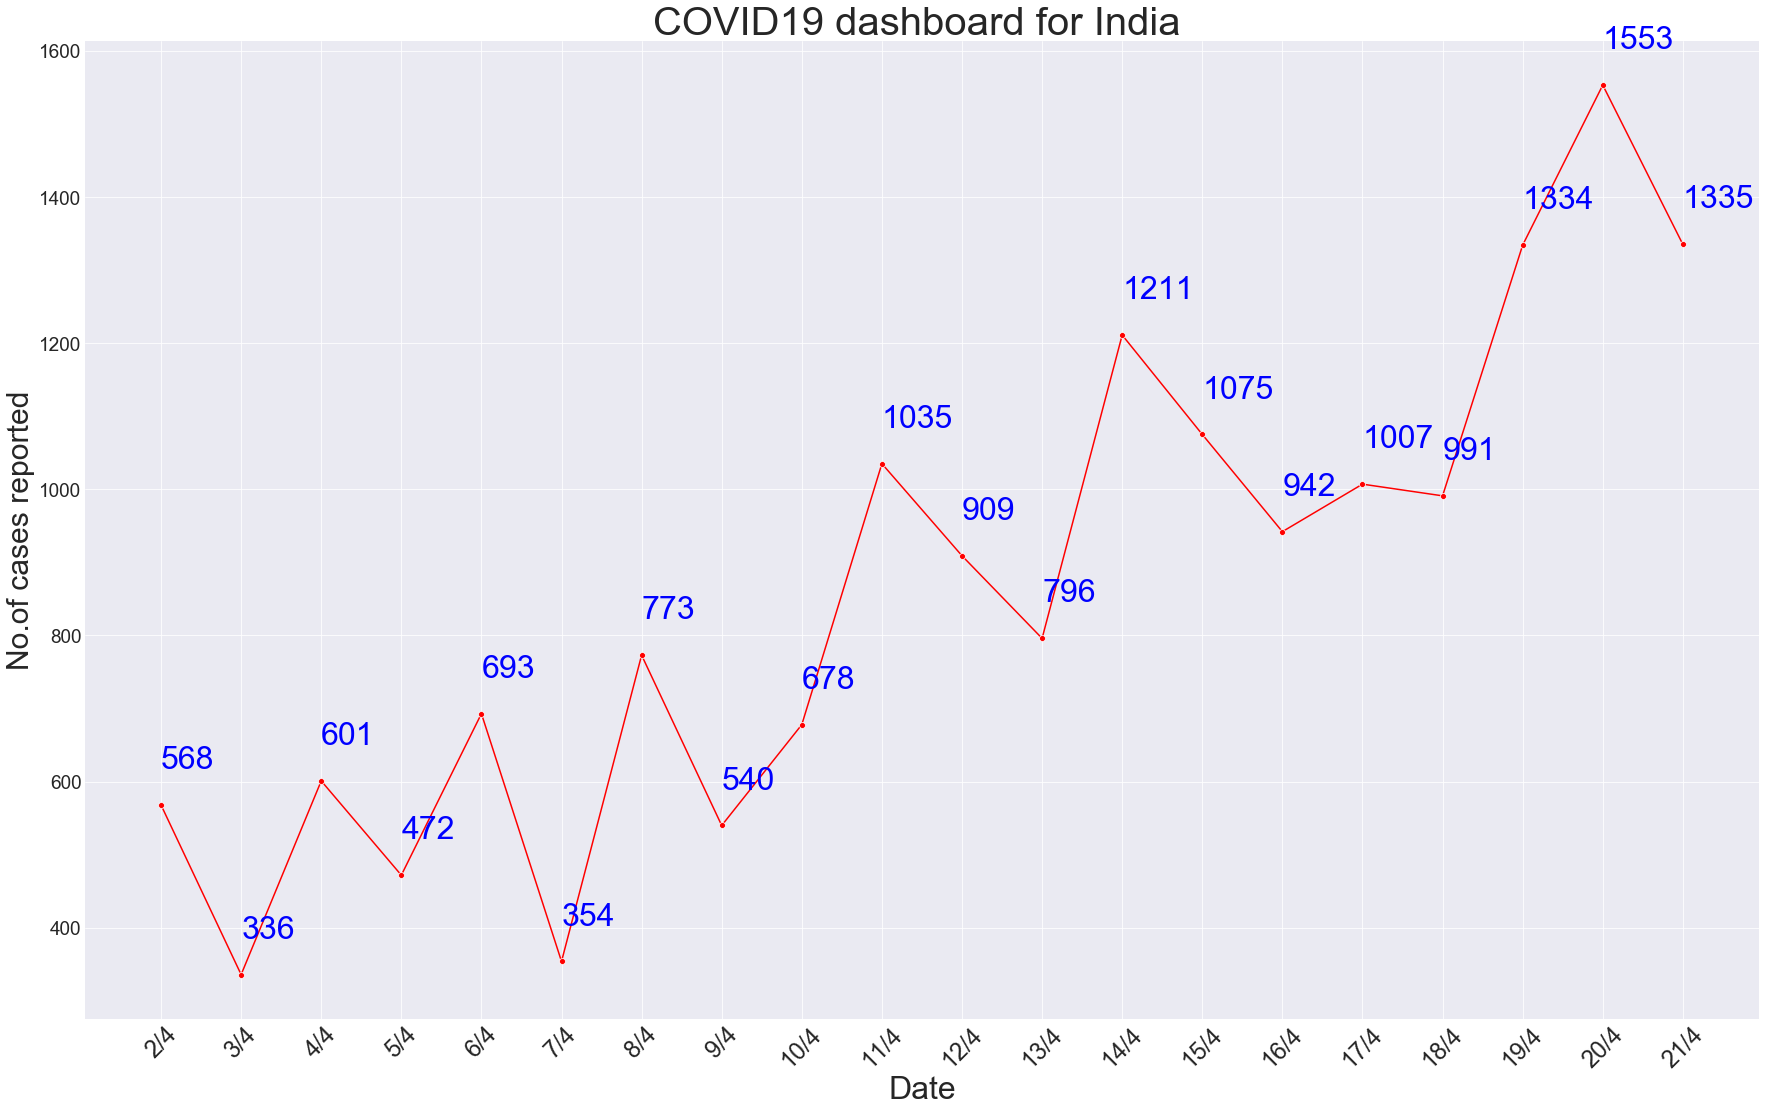

(221, b'2.0.0 closing connection 127sm2643571pfw.72 - gsmtp')

In [7]:
#FINALISED CODE#

from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase 
from email import encoders 
from smtplib import SMTP
import smtplib
import sys
import base64
from base64 import b64encode
import io


cmap = sns.cubehelix_palette(dark=.3, as_cmap=True)
plt.figure(figsize=(30, 18))
plt.style.use('seaborn-darkgrid')
ax=sns.lineplot(x="Date", y="newcases",
                        palette='dark',
                        #sizes=(4,40),
                        legend="full",
                        #hue='deaths',
                        #size='newcases',
                        data=indiadf,  
                       marker='o', 
                       color='r',sort=False,sizes=(100,200)
                #,size='newcases'
                #,sizes=(100,200)
               )

# Adding annotations to list no of newcases in each data point
[ax.text(p[0], p[1]+50, p[1], color='B', size=32) for p in zip(ax.get_xticks(), indiadf['newcases'])]

        
plt.title("COVID19 dashboard (India) ", fontsize=40); #Corona Pandemic LIVE (India)- Created by SABI
plt.xlabel("Date",fontsize=32);
plt.ylabel("No.of cases reported",fontsize=30);
plt.xticks(size=24,rotation=45)
xticks = ax.get_xticks()
plt.yticks(size=19,rotation=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=1)
plt.setp(ax.get_legend().get_texts(),fontsize=20)

f=io.BytesIO()
#img_format='png'
plt.savefig(f, format='png')
f.seek(0)

#figdata_png = base64.b64encode(f.getvalue())
#result=str(figdata_png)[2:-1]
#fig = ax.get_figure()
#img=f.read()

plt.show()

server = smtplib.SMTP('smtp.gmail.com',587)
server.ehlo()
server.starttls()
server.login('vinovk916@gmail.com','Upham123')

recipients = ['vinodhkumar.deenadayalan@astrazeneca.com','murali.perumal@astrazeneca.com'] 
emaillist = [elem.strip().split(',') for elem in recipients]
msg = MIMEMultipart()
msg['Subject'] = "Covid"
msg['From'] = 'vinovk916@gmail.com'

part = MIMEBase('image', "png")
part.set_payload(f.read() )
encoders.encode_base64(part)

html = """\
<html>
  <head><title>Daily cases</title></head>
  <link rel="stylesheet" type="text/css" href="df_style.css"/>
  <style> 
  table, th, td {{font-size:10pt; border:2px solid #ccc; border-collapse:collapse; text-align:center;}}
  th, td {{padding: 5px;}}

  </style>
  <body>
    {0}
    
  </body>
</html>
""".format(indiadf[["newcases","deaths","Date"]].tail(30).to_html(index=False))

#from email.mime.image import MIMEImage
part1 = MIMEText(html, 'html')
#im=MIMEImage(figdata_png.read(),'png')
msg.attach(part1)
#part.add_header('Image', 'attachment; filename="%s"' % 'image.png')
msg.attach(part)

server.sendmail(msg['From'], emaillist, msg.as_string())
server.quit()

In [471]:
img_data#=f.read()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x0b\xb8\x00\x00\x07\x08\x08\x06\x00\x00\x00\xac\x7f\x8cx\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0fa\x00\x00\x0fa\x01\xa8?\xa7i\x00\x00\x009tEXtSoftware\x00matplotlib version 3.0.3, http://matplotlib.org/\x9d\x0b\xab\xa3\x00\x00 \x00IDATx\x9c\xec\xddy\xbc\x97s\xfe?\xfe\xe7i\xd7\xd1\xa6\x85\x16JI\x91\xd2Bj\x981\x18\x9a\xeck>\xbe\xd9\x85\x1934\x8d\xc8n\x16$\xcb\xf0\xa1\xc8\x12\x11#\x94lI\x91m\xacY*\xaa\x13\xd5h\xd7\xa6\xd2\xde9:\xe7\xf7\x87_>\x9d\xde\xd7\xa9\xf3~w\xd2{\xcc\xfd\xfe\xd7\xe7<\xaf\xeb\xb5\\\xef\xf7\xf5~57\x9f\xc7\xf5\xbar\x8a\x8a\x8a\x8a\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00v\xb0r;z\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10!\xe0\x0e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x96\x10p\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 +\x08\xb8\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x90\x15\x04\xdc\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc8\n\x02\xee\x00\x00\x00\x00\x00\x00\x00

In [443]:
#Lets send the mail-----------------------------------------------------------------
import smtplib
from email.message import EmailMessage

server = smtplib.SMTP('smtp.gmail.com',587)
server.ehlo()
server.starttls()
    #server.ehlo()

msgRoot = MIMEMultipart("related")
msgText = MIMEText(content, "html")
msgAlternative.attach(msgText)

if filename is not "":
        img = MIMEImage(open(filename, "rb").read(), _subtype="png")
        img.add_header("Content-ID", "<carpedm20>")
        msgRoot.attach(img)


server.login('vinovk916@gmail.com','Upham123')
subject = "Corona update "
body = "How's this? provide your feedback :"
msg = f"Subject: {subject} \n\n {body} "
server.sendmail('vinovk916@gmail.com','vinodhkumar.deenadayalan@astrazeneca.com',msg)
    #print("HEY check this out.")
    #smtpserver.close()
server.quit()


(221, b'2.0.0 closing connection v4sm11129492pfb.31 - gsmtp')

In [57]:
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
from smtplib import SMTP
import smtplib
import sys
from base64 import b64encode


server = smtplib.SMTP('smtp.gmail.com',587)
server.ehlo()
server.starttls()
server.login('vinovk916@gmail.com','Upham123')

recipients = ['vinodhkumar.deenadayalan@astrazeneca.com'] 
emaillist = [elem.strip().split(',') for elem in recipients]
msg = MIMEMultipart()
msg['Subject'] = "Your Subject"
msg['From'] = 'vinovk916@gmail.com'
encoded=f

html = """\
<html>
  <head></head>
  <body>
    {0}
    <img src="data:image/png;base64, format(encoded.decode('ascii'))">
  </body>
</html>
""".format(indiadf[["newcases","deaths","Date"]].tail(30).to_html(index=False))

part1 = MIMEText(html, 'html')
msg.attach(part1)

server.sendmail(msg['From'], emaillist , msg.as_string())

{}

In [9]:
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase 
from email import encoders 
from smtplib import SMTP
import smtplib
import sys
import base64
from base64 import b64encode
import io

import smtplib
from email.message import EmailMessage

server = smtplib.SMTP('smtp.gmail.com',587)
server.ehlo()
server.starttls()

user_name='vinodh247@gmail.com'
password='catonthewall'
server.login(user_name,password)
subject = "Corona update "
body = "How's this? provide your feedback :"
msg = f"Subject: {subject} \n\n {body} "
server.sendmail(user_name,'vinodhkumar.deenadayalan@astrazeneca.com',msg)
    #print("HEY check this out.")
    #smtpserver.close()
server.quit()


SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials k12sm2492403pgj.33 - gsmtp')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


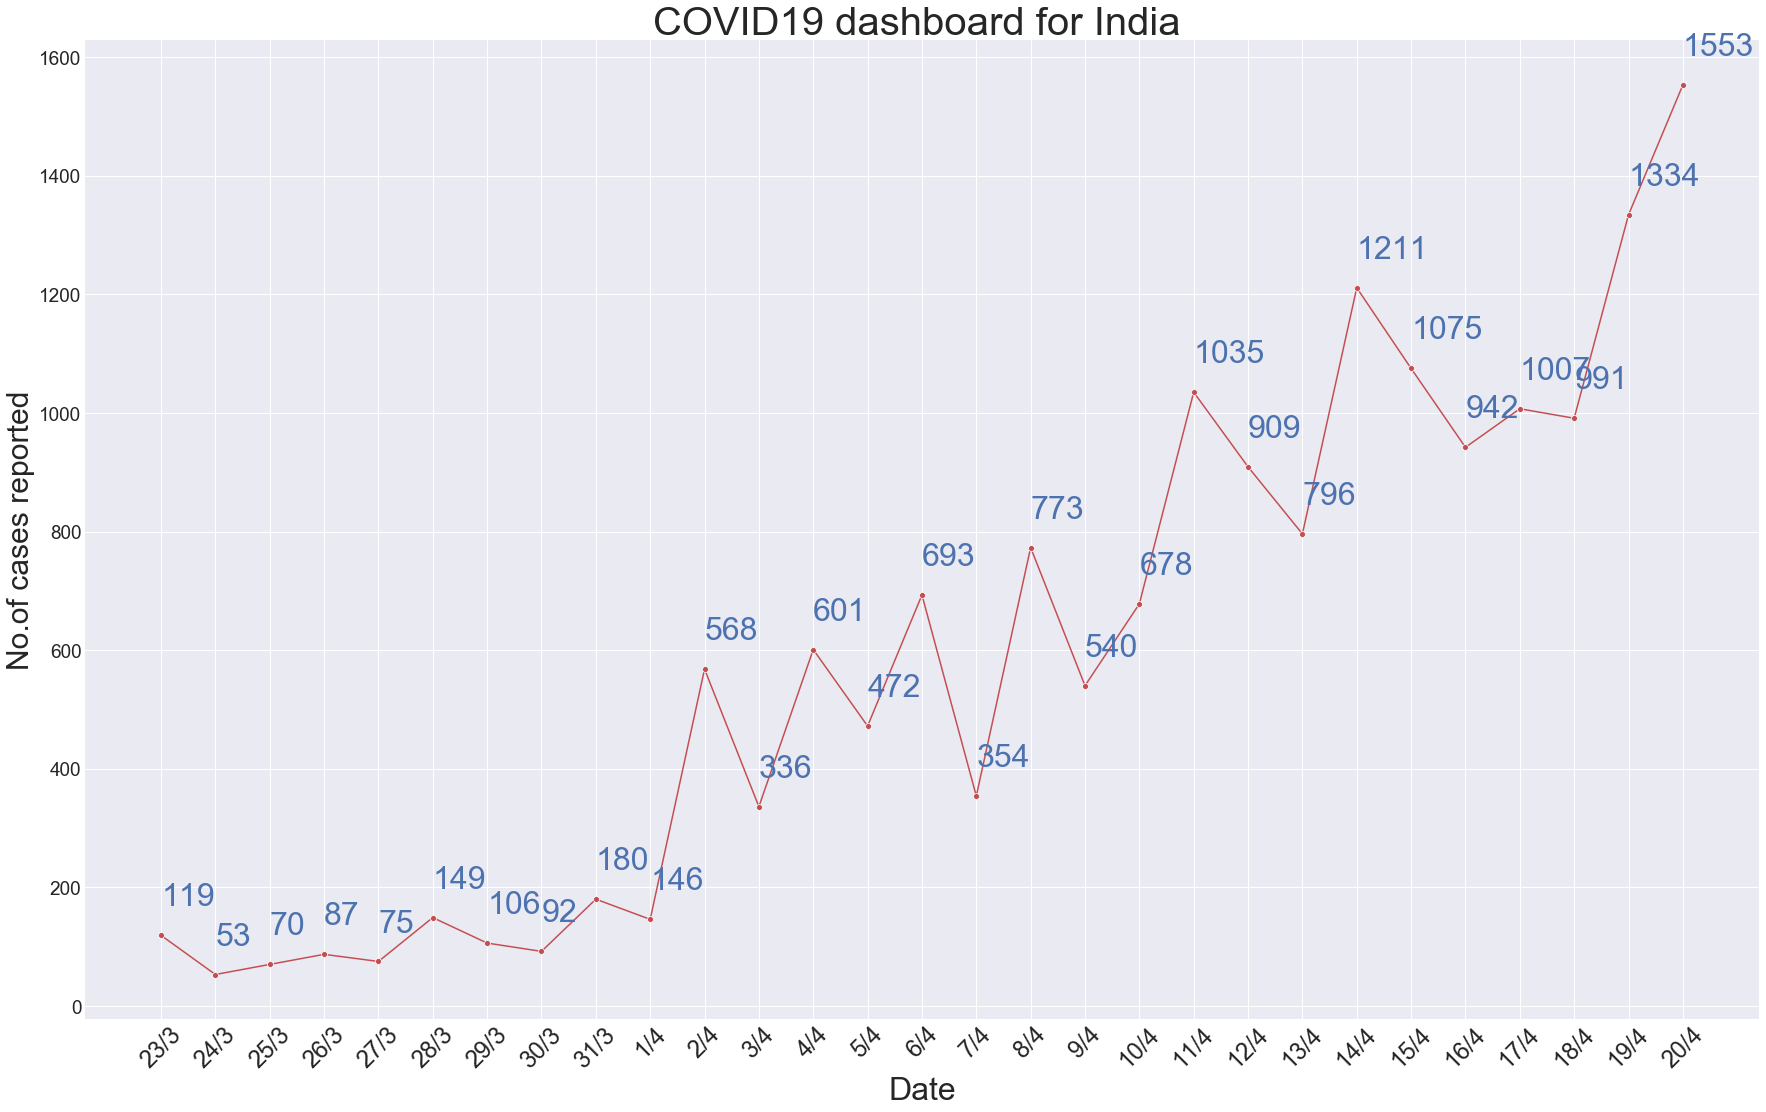

(221, b'2.0.0 closing connection 202sm869735pgf.41 - gsmtp')

In [108]:
# MASTER SCRIPT FINAL# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import io
import datetime
import requests
from smtplib import SMTP
import smtplib
import sys
import base64
from base64 import b64encode
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase 
from email import encoders 

now = datetime.datetime.now()
url1=('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
r=requests.get(url1, allow_redirects=True)
open(r"C:/Users/kmfj819/Desktop/Temp/test_covid1.xlsx", 'wb').write(r.content)

ecdc_df=pd.read_csv(url1, error_bad_lines=False, usecols = lambda column : column not in 
["dateRep","geoId","countryterritoryCode","popData2018"])

ecdc_df.reset_index(drop=True,inplace=True)
ecdc_df.rename(columns={'cases':'newcases','countriesAndTerritories':'country'},inplace=True)

countries=ecdc_df.groupby('country')
indiadf=countries.get_group("India")
indiadf['Date']=indiadf['day'].astype(str)+"/"+indiadf['month'].astype(str)
indiadf=indiadf.sort_values(['month','day']).tail(30)
indiadf=indiadf[:-1] #dropping the last row in the df


cmap = sns.cubehelix_palette(dark=.3, as_cmap=True)
plt.figure(figsize=(30, 18))
plt.style.use('seaborn-darkgrid')
ax=sns.lineplot(x="Date", y="newcases",
                        palette='dark',
                        #sizes=(4,40),
                        legend="full",
                        #hue='deaths',
                        #size='newcases',
                        data=indiadf,  
                       marker='o', 
                       color='r',sort=False,sizes=(100,200)
                #,size='newcases'
                #,sizes=(100,200)
               )

# Adding annotations to list no of newcases in each data point
[ax.text(p[0], p[1]+50, p[1], color='B', size=32) for p in zip(ax.get_xticks(), indiadf['newcases'])]

        
plt.title("COVID19 dashboard for India ", fontsize=40); #Corona Pandemic LIVE (India)- Created by SABI
plt.xlabel("Date",fontsize=32);
plt.ylabel("No.of cases reported",fontsize=30);
plt.xticks(size=24,rotation=45)
xticks = ax.get_xticks()
plt.yticks(size=19,rotation=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=1)
plt.setp(ax.get_legend().get_texts(),fontsize=20)

f=io.BytesIO()
#img_format='png'
plt.savefig(f, format='png')
f.seek(0)

#figdata_png = base64.b64encode(f.getvalue())
#result=str(figdata_png)[2:-1]
#fig = ax.get_figure()
#img=f.read()

plt.show()

server = smtplib.SMTP('smtp.gmail.com',587)
server.ehlo()
server.starttls()
server.login('vinovk916@gmail.com','Upham123')

recipients = ['vinodhkumar.deenadayalan@astrazeneca.com', 'Murali.perumal@astrazeneca.com'] 
emaillist = [elem.strip().split(',') for elem in recipients]
msg = MIMEMultipart()
msg['Subject'] = "----Covid19----"
msg['From'] = 'vinovk916@gmail.com'
part = MIMEBase('image', "png")
part.set_payload(f.read() )
encoders.encode_base64(part)
html = """\
<html>
  <head><title>Daily cases</title></head>
  <link rel="stylesheet" type="text/css" href="df_style.css"/>
  <style> 
  table, th, td {{font-size:10pt; border:2px solid #ccc; border-collapse:collapse; text-align:center;}}
  th, td {{padding: 5px;}}

  </style>
  <body>
    {0}
    
  </body>
</html>
""".format(indiadf[["newcases","deaths","Date"]].tail(30).to_html(index=False))

#from email.mime.image import MIMEImage
part1 = MIMEText(html, 'html')
#im=MIMEImage(figdata_png.read(),'png')
msg.attach(part1)
#part.add_header('Image', 'attachment; filename="%s"' % 'image.png')
msg.attach(part)

server.sendmail(msg['From'], emaillist, msg.as_string())
server.quit()